In [126]:
# https://roboreport.co.kr/category/blog/toolkit/

In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
dataframe = pd.read_csv("C:/Users/wjddu/git/BigData/train/train_ori.csv")

In [129]:
dataframe

,date,year,month,day,hour,pow_gen,month.1,hour.1,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,12,14,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,12,15,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,12,16,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,12,17,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,12,18,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,12,19,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,12,20,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,12,21,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,12,22,-2.7,73,-6.8,0.000,8


In [130]:
dataframe = dataframe.loc[:, ~dataframe.T.duplicated()]
dataframe = dataframe.drop(['hour.1'], axis='columns')

In [131]:
dataframe

,date,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,-2.7,73,-6.8,0.000,8


In [132]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35487 entries, 0 to 35486
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         35487 non-null  object 
 1   year         35487 non-null  int64  
 2   month        35487 non-null  int64  
 3   day          35487 non-null  int64  
 4   hour         35487 non-null  int64  
 5   pow_gen      35487 non-null  float64
 6   temperature  35487 non-null  float64
 7   humidity     35487 non-null  int64  
 8   dew_point    35487 non-null  float64
 9   sol_rad      35487 non-null  float64
 10  cloud        35487 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 3.0+ MB


In [133]:
dataframe.isnull().sum()

date           0
year           0
month          0
day            0
hour           0
pow_gen        0
temperature    0
humidity       0
dew_point      0
sol_rad        0
cloud          0
dtype: int64

In [134]:
dataframe.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000
mean,2018.470679,6.590357,15.808747,11.500944,238.973340,13.678336,67.673711,6.832536,144.023715,3.040156
std,1.145249,3.481386,8.796943,6.924057,361.764514,10.079480,23.528315,11.879715,225.608522,3.948471
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-12.900000,0.000000,-26.900000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.000000,0.000000,5.300000,49.000000,-2.100000,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,11.000000,0.170000,14.200000,71.000000,7.500000,2.778000,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,411.734500,21.800000,89.000000,17.100000,230.556000,7.000000
max,2020.000000,12.000000,31.000000,23.000000,1396.853000,39.200000,100.000000,28.000000,975.000000,10.000000


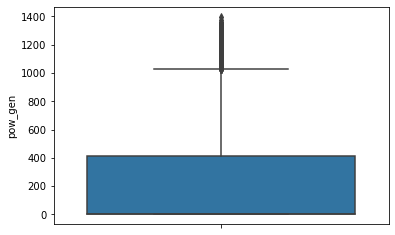

In [135]:
sns.boxplot(y = dataframe['pow_gen'] );

In [136]:
quantile_25 = np.quantile(dataframe['pow_gen'], 0.25)
quantile_75 = np.quantile(dataframe['pow_gen'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-617.60175 1029.33625


In [137]:
dataframe.drop(dataframe[dataframe.pow_gen >= 1029.33625]. index, inplace = True)

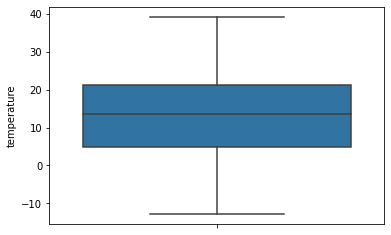

In [138]:
sns.boxplot(y = dataframe['temperature'] );

In [139]:
quantile_25 = np.quantile(dataframe['temperature'], 0.25)
quantile_75 = np.quantile(dataframe['temperature'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-19.450000000000003 45.75


In [140]:
dataframe.drop(dataframe[dataframe.temperature >= 45.75]. index, inplace = True)

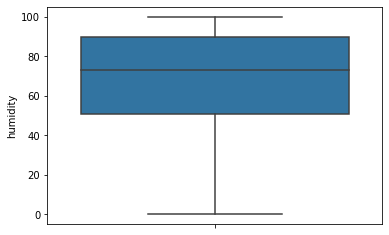

In [141]:
sns.boxplot(y = dataframe['humidity'] );

In [142]:
quantile_25 = np.quantile(dataframe['humidity'], 0.25)
quantile_75 = np.quantile(dataframe['humidity'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-7.5 148.5


In [143]:
dataframe.drop(dataframe[dataframe.humidity >= 148.5]. index, inplace = True)

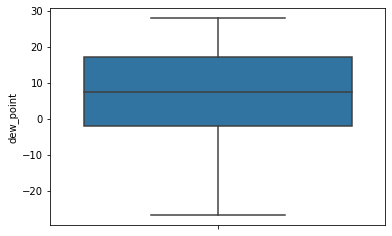

In [144]:
sns.boxplot(y = dataframe['dew_point'] );

In [145]:
quantile_25 = np.quantile(dataframe['dew_point'], 0.25)
quantile_75 = np.quantile(dataframe['dew_point'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-31.150000000000002 46.050000000000004


In [146]:
dataframe.drop(dataframe[dataframe.dew_point >= 46.050000000000004]. index, inplace = True)

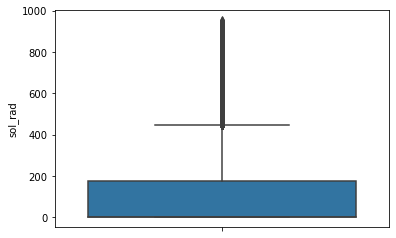

In [147]:
sns.boxplot(y = dataframe['sol_rad'] );

In [148]:
quantile_25 = np.quantile(dataframe['sol_rad'], 0.25)
quantile_75 = np.quantile(dataframe['sol_rad'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-266.667 444.44499999999994


In [149]:
dataframe.drop(dataframe[dataframe.dew_point >= 444.44499999999994]. index, inplace = True)

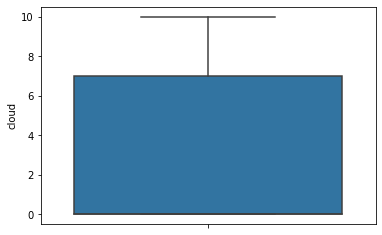

In [150]:
sns.boxplot(y = dataframe['cloud'] );

In [151]:
quantile_25 = np.quantile(dataframe['cloud'], 0.25)
quantile_75 = np.quantile(dataframe['cloud'],0.75)
IQR = quantile_75 - quantile_25
minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 + 1.5 * IQR
print(minimum, maximum)

-10.5 17.5


In [152]:
dataframe.drop(dataframe[dataframe.dew_point >= 17.5]. index, inplace = True)

In [153]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 35486
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         25553 non-null  object 
 1   year         25553 non-null  int64  
 2   month        25553 non-null  int64  
 3   day          25553 non-null  int64  
 4   hour         25553 non-null  int64  
 5   pow_gen      25553 non-null  float64
 6   temperature  25553 non-null  float64
 7   humidity     25553 non-null  int64  
 8   dew_point    25553 non-null  float64
 9   sol_rad      25553 non-null  float64
 10  cloud        25553 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 2.3+ MB


In [154]:
dataframe

,date,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,-2.7,73,-6.8,0.000,8


<AxesSubplot:>

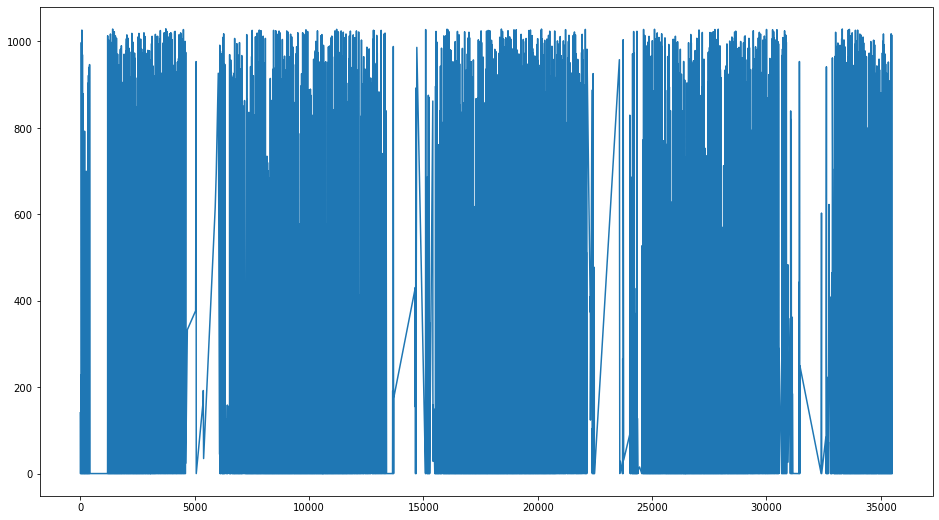

In [155]:
plt.figure(figsize=(16, 9))
dataframe['pow_gen'].plot()

In [156]:
dataframe['date'] = pd.to_datetime(dataframe['date'], format="%Y-%m-%d-%H")

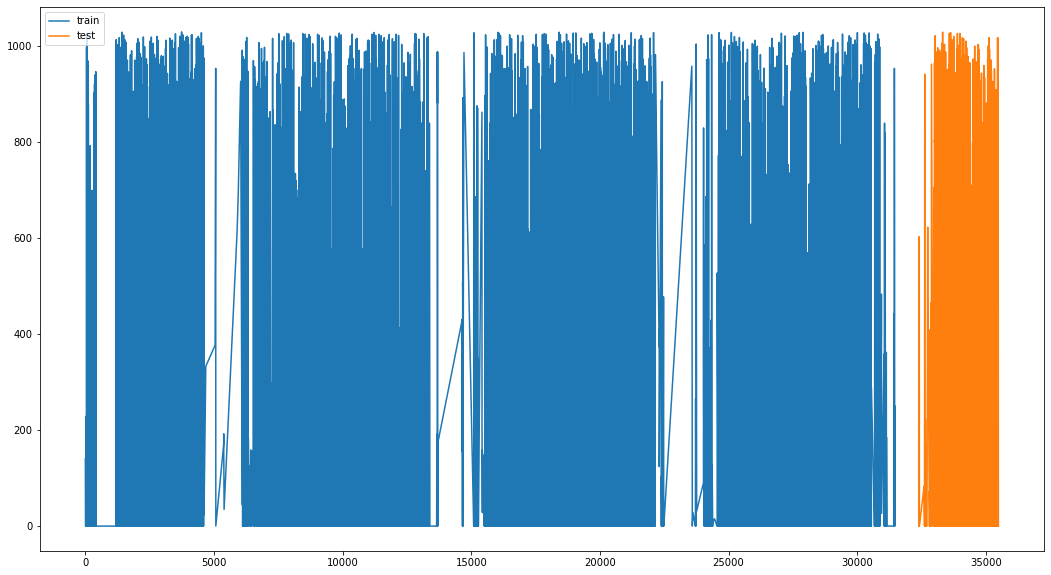

In [178]:
# split_date = pd.Timestamp('12/13/2019 6:00PM')

train = dataframe.loc[:32000, ['pow_gen']]
test = dataframe.loc[32000:, ['pow_gen']]
plt.rcParams["figure.figsize"] = (18,10)

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [179]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[1.36634708e-01],
       [8.33550320e-02],
       [3.16638944e-02],
       ...,
       [1.65169133e-04],
       [8.92292237e-02],
       [2.42434282e-01]])

In [180]:
train_sc_df = pd.DataFrame(train_sc, columns=['pow_gen'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['pow_gen'], index=test.index)
train_sc_df.head()

,pow_gen
0,0.136635
1,0.083355
2,0.031664
3,0.000150
4,0.000000


In [181]:
for s in range(1, 20):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['pow_gen'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['pow_gen'].shift(s)

train_sc_df.head(20)

,pow_gen,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19
0,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,0.000000,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,0.000000,0.000000,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,0.000000,0.000000,0.000000,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.031664,0.083355,0.136635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
train = dataframe[(dataframe.year > 2006) & (dataframe.year < 2020)]
test = dataframe[dataframe.year >= 2020]

feature_names = ['temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']

X_train = train[feature_names]
X_test = test[feature_names]

lable_name = "pow_gen"
Y_train = train[lable_name]

Y_test = test[lable_name]


print(X_train.shape)
print(X_test.shape)

(19233, 5)
(6320, 5)


In [183]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(X_train, Y_train)
accuracy = lm.score(X_test, Y_test)
print ("Linear Regression test file accuracy:"+str(accuracy))

lm.coef_

Linear Regression test file accuracy:0.6100032399813106


array([-7.65517716, -2.47272343,  9.05085512,  1.08307636,  4.18507719])

In [184]:
X_Cols = X_train.rename(columns= {'temperature': '온도', 'humidity': '습도', 'dew_point':'이슬점',  'sol_rad': '태양열 크기', 'cloud' : '구름량'})
print(X_train.columns)
coefs = pd.DataFrame(zip(X_Cols.columns,lm.coef_), columns = ['features', 'coefficients'])


coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)


Index(['temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud'], dtype='object')


,features,coefficients
2,이슬점,9.050855
0,온도,-7.655177
4,구름량,4.185077
1,습도,-2.472723
3,태양열 크기,1.083076


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

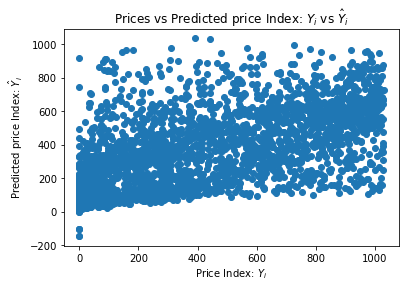

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

Text(0, 0.5, 'pow_gen')

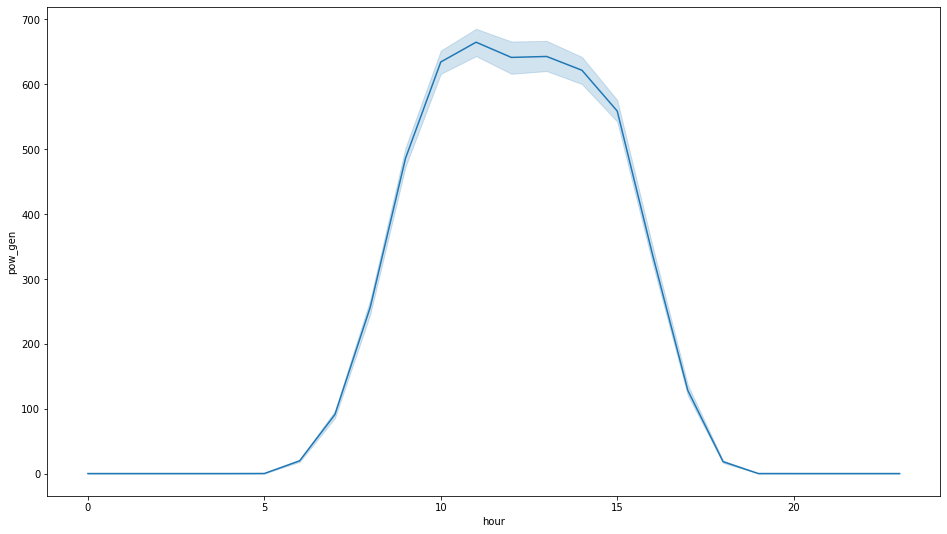

In [165]:
#10시~15시는 pow_gen이 다른 시간대에 비하여 훨씬 높은 수치! 왜 그럴까? 
plt.figure(figsize=(16, 9))
sns.lineplot(y=dataframe['pow_gen'], x=dataframe['hour'])
plt.xlabel('hour')
plt.ylabel('pow_gen')

In [29]:
dataframe.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000,25553.000000
mean,2018.450358,6.366493,15.846789,11.385317,185.442600,9.623665,64.381051,2.179936,115.853330,2.652252
std,1.161391,3.942382,8.690990,7.121679,301.654632,8.400420,23.444417,9.769439,194.881219,3.802384
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-12.900000,0.000000,-26.900000,0.000000,0.000000
25%,2017.000000,3.000000,8.000000,5.000000,0.000000,3.000000,46.000000,-5.000000,0.000000,0.000000
50%,2018.000000,5.000000,16.000000,11.000000,0.000000,9.200000,65.000000,2.900000,0.000000,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,279.659000,16.200000,85.000000,10.500000,169.444000,6.000000
max,2020.000000,12.000000,31.000000,23.000000,1029.248000,39.200000,100.000000,17.400000,955.556000,10.000000


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols = ['pow_gen', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']
df_scaled = scaler.fit_transform(dataframe[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,0.136635,0.330134,0.77,0.620767,0.104651,0.0
1,0.083355,0.330134,0.80,0.632054,0.075581,0.0
2,0.031664,0.320537,0.80,0.620767,0.058140,0.0
3,0.000150,0.312860,0.80,0.611738,0.014535,0.0
4,0.000000,0.297505,0.86,0.616253,0.002907,0.0
...,...,...,...,...,...,...
25548,0.000000,0.230326,0.65,0.458239,0.000000,0.8
25549,0.000000,0.218810,0.66,0.449210,0.000000,0.8
25550,0.000000,0.211132,0.75,0.478555,0.000000,0.8
25551,0.000000,0.195777,0.73,0.453725,0.000000,0.8


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataframe[['pow_gen']] = scaler.fit_transform(dataframe[['pow_gen']])
dataframe[['temperature']] = scaler.fit_transform(dataframe[['temperature']])
dataframe[['humidity']] = scaler.fit_transform(dataframe[['humidity']])
dataframe[['dew_point']] = scaler.fit_transform(dataframe[['dew_point']])
dataframe[['sol_rad']] = scaler.fit_transform(dataframe[['sol_rad']])
dataframe[['cloud']] = scaler.fit_transform(dataframe[['cloud']])